# Day 2
* 다중 회귀, 릿지 회귀, 라쏘 회귀
* 손실함수와 비용함수, 조기종료
* 로지스틱 회귀
* SGB Classifier
* 나이브 베이즈

## 다중 회귀 (Multiple Regression)
* 여러 개의 특성을 사용한 선형 회귀
* 1개의 특성을 사용한 경우 선형 회귀 모델이 학습하는 것: 직선
* 2개의 특성을 사용한 경우 선형 회귀 모델이 학습하는 것: 평면
* 다중의 독립변수가 있는 형태
* 단순 회귀 분석의 확장
* 기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업 -> 특성 공학 (Feature Engineering)
* Polynomial Features 클래스를 이용하면 다양한 특성을 고려할 수 있음
* 즉, 주어진 차수까지 특성 간의 모든 교차항을 고려
* 편향과 분산의 트레이브 오프 문제
* 편향(Bias)
    * 지나치게 단순화된 모델로 한 방향으로 치우치는 경향
    * 편향이 크면 underfitting 야기. 모델의 중요한 요소를 고려하지 못할 가능성 존재
* 분산(Vairance)
    * 지나치게 복잡한 모델로 높은 변동성
    * 분산이 크면 overfitting을 야기. 훈련 데이터에 지나치게 적합을 시켜 일반화가 되지 않은 모델 구축
* 특성의 개수를 늘리면 선형 모델을 아주 강력해짐 -> 거의 완벽하게 훈련 데이터셋에 대한 학습이 가능해질 것
* 하지만 훈련 데이터셋에 오버피팅의 가능성 존재
* 특성을 줄이는 조치를 해줘야 함: 규제

## 규제를 추가한 모델: 릿지와 라쏘
* 규제(regularization): 머신러닝 모델이 훈련 데이터셋을 너무 과도하게 학습하지 못하도록 훼방하는 것
* 즉, 모델이 훈련 데이터셋에 오버피팅 되지 않도록 만드는 것
* ex. 선형 회귀 모델: 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 것
* 제약조건: 계수의 크기 제한
* 릿지(ridge): 계수를 제곱한 값을 기준으로 규제를 적용
* 라쏘(lasso): 계수의 절댓값을 기준으로 규제를 적용
* 규제의 양을 임의로 조절가능. alpha 값이 크면 규제 강도가 커지므로 계수 값을 줄이고 조금 더 과소적합 되도록 유도
* alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합 될 가능성이 큼
* 두 알고리즘 모두 계수의 크기를 줄이지만, 라쏘는 아예 0으로 만들 수도 있음
* 일반적으로 릿지를 조금 더 선호

### 릿지 회귀
* 규제항은 훈련하는 동안에만 비용함수에 추가
* 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가
* 편향은 규제되지 않음 (i=1에서 시작)
* 영향을 거의 미치지 않는 특성에 대하여 0에 가까운 가중치를 부여

### 라쏘 회귀
* 특성값의 계수가 매우 낮다면, 0으로 수렴하게 해서 특성을 지워버림
* 특성이 모델에 미치는 영향을 0으로 만들기 -> bias 증가 -> overfitting 방지

## 손실함수와 비용함수, 조기종료

### 손실함수 (Loss Function)
* 실제 y값에 비해 가정한 모델의 y_hat(추정값)이 얼마나 잘 예측됐는지 판단하는 함수
* 샘플 하나에 대한 손실을 정의
* L1 손실함수: 실제값과 예측값의 차이의 절댓값
* L2 손실함수: 실제값과 예측값의 차이의 제곱

### 비용함수(Cost Function); 목적함수
* 머신러닝 알고리즘의 최적화는 곧 비용함수의 값이 작아지는 파라미터를 찾는 과정 안에서 이루어짐
* Gradient Descent (GD) 기반의 방식이 가장 기본 알고리즘
* 비용함수는 손실함수를 사용하여 정의될 수 있음. 즉, 훈련 세트에 있는 모든 샘플에 대한 손실함수의 합
* 비용함수의 예: MSE(Mean Squared Error), MAE(Mean Absolute Error), Binary Cross-entropy(log-loss) 등

### 조기종료 (Early Stopping)
* 반복학습 알고리즘의 규제 방법
* validation error가 최솟값에 도달하면 훈련을 중지시키는 것
* validation set의 error가 알고리즘의 학습에 따라 감소했다가 증가하는 현상이 나타남 -> 모델이 훈련 데이터에 overfitting 되었기 때문에 나타나는 현상
* 만약, 최솟값에 도달했는지 확인하기 어려운 경우? -> 특정횟수 지정

## 로지스틱 회귀
* 분류 알고리즘
* 샘플이 특정 클래스에 속할 확률을 추정하는 데 사용 (보통 50%를 기준으로 사용하며, 이진 분류 수행)
* 이름은 회귀이지만 분류 모델
* 선형회귀와 동일하게 선형 방정식 학습
* z = ax + by + cw + f (a, b, c는 가중치 혹은 계수)
* z는 어떤 값이든 가능하지만, 확률이 되려면 0~1(0~100%) 사잇값이 되어야 함
* sigmoid function or logistic function 이용
* 훈련과 비용 함수
    * 훈련의 목적: 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고, 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터를 찾는 것
    * 로지스틱 회귀의 비용함수(로그 손실) = 이진 크로스 엔트로피 손실 함수

## 다항 로지스틱 회귀 (Multiple Logistic Regression)
* 다중 클래스를 위한 다항 로지스틱 회귀 = 소프트맥스 회귀 (Softmax Regression)
* 샘플 x가 주어지면 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정
* 클래스마다 z값을 하나씩 계산하여, 가장 높은 확률 값을 출력하는 클래스가 예측 클래스가 됨
* 훈련 방법
    * 모델이 타깃 클래스에 대해서는 높은 확률로 추정하도록 만드는 것이 목적
    * Cross-entropy 비용함수를 최소화하는 것
    * 타깃 클래스에 대해 낮은 확률을 예측하는 모델 억제
    * Croww-entropy는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 사용

## SGD Classifier (Stochastic Gradient Descent Classifier)
* 점진적인 학습
* 훈련 데이터가 한 번에 준비되는 것이 아니라 조금씩 전달된다면?
* 기존의 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일 다시 훈련시킨다면?
* 새로운 데이터를 추가하면서 이전 데이터를 버려서 훈련 데이터 크기를 일정하게 유지한다면?
* 훈련한 모델을 버리지 않고, 새로운 데이터에 대해서만 조금씩 더 훈련할 수 없을까?
* '점진적 학습'을 적용한 알고리즘 =  확률적 경사 하강법 (Stochastic Gradient Descent)
* 경사하강법: 가장 가파른 경사를 따라 원하는 지점에 도달하도록 하는 것이 목표
* 확률적 경사하강법: 전체 샘플을 사용하는 것이 아니라, 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾도록 하는 것
* 확률적 경사하강법은 훈련 데이터셋을 이용하여 최적의 장소로 조금씩 이동하는 알고리즘
* 만약, 훈련 데이터셋이 모두 준비되지 않더라도, 중간에 업데이트 되는 데이터가 있더라도 학습을 이어나갈 수 있음
* 함숫값이 가장 빨리 감소하는 방향 구하기
* 우리의 목적: 주어진 우리의 데이터에 대해서 출력값을 잘 도출하는 함수를 찾고 싶음
* 그러기 위해서?: loss값을 작게하는 loss function의 입력값(파라미터)을 찾아야 함 -> 어떻게? -> GD
* 모델링 -> 손실계산 -> 최적화
* SGD Classifier이란, SGD를 이용한 선형 분류 모델
* 기존의 머신러닝 모델들에 SGDClassifier()를 적용하면 SGD 적용 가능
* 해당 객체는 전달한 훈련 세트에서 1개씩 샘플을 꺼내서 GD 수행
* GD vs. SGD
    * 모든 데이터를 계산해서 업데이트 vs. 일부 데이터만 계산한 후 업데이트
    * 최적의 한 스텝으로 전진 vs. 빠르게 전진
    * 확실한데 너무 느림 vs. 조금 헤매지만 그래도 빠름

## 나이브 베이즈 (Naive Bayes)
* Bayes 이론은 새로운 정보와 사건의 사전확률이 주어졌을 때, 어떤 사건이 일어날 확률을 이해하는 방법
* 머신러닝 이전부터 있었던 방법론
* 베이즈 이론을 분류에 적용한 것이 나이브 베이즈 분류기
* 직관적인 방법을 사용
* 적은 양의 데이터에서 사용 가능
* 훈련과 예측 계산 비용이 적게 발생
* 환경이 바뀌더라도 안정적인 결과 생성
* 각 특성과 특성의 likelihood가 독립적이라고 가정하기 때문에 나이브 베이즈라는 이름이 붙음
* 나이브 베이즈는 데이터에 있는 각 특성에 대해 likelihood의 통계적 분포를 가정해야 함 (특성의 성질에 따라 분포를 선택함)

## 특성 공학과 규제
* 특성 공학이란, 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업
* 판다스는 유명한 데이터 분석 라이브러리
* 데이터프레임은 판다스의 핵심 데이터 구조

In [1]:
import pandas as pd

In [2]:
# csv 파일을 read_csv() 함수로 데이터프레임화
df = pd.read_csv("https://bit.ly/perch_csv_data")

# to_numpy() 메서드를 통해 넘파이 배열로 변경
perch_full = df.to_numpy()

# perch_full 출력: (1열 length, 2열 height, 3열 width)
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
# 타깃 데이터 준비 및 훈련 세트와 테스트 세트로 나누기

import numpy as np

# 넘파이 배열의 농어의 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
    )

In [4]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [5]:
# 사이킷런에서 특성을 만들거나 전처리하기 위한 다양한 클래스 제공
# 사이킷런에서는 이런 클래스를 변환기라고 함

# 변환기 (transformer) PolynomialFeatures import
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# PolynomialFeatures 클래스의 객체를 생성
poly = PolynomialFeatures()

# 샘플 [2,3]으로 훈련
# 두 개의 특성 2와 3으로 이루어진 샘플 하나를 적용
poly.fit([[2, 3]])

# 새롭게 만들어진 특성 조합 출력
# fit 메서드는 새롭게 만들 특성 조합을 찾고, transform 메서드는 실제로 데이터 변환
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [7]:
# include_bias = False로 특성 1을 제거
poly = PolynomialFeatures(include_bias = False)

poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

# 절편을 위한 항이 제거되고, 특성의 제곱과 특성끼리 곱한 항만 추가

[[2. 3. 4. 6. 9.]]


In [8]:
poly = PolynomialFeatures(include_bias = False)

# train_input으로 훈련
poly.fit(train_input)

train_poly = poly.transform(train_input)

In [9]:
# 새로운 특성 조합으로 구성된 train_poly shape 출력
print(train_poly.shape)

(42, 9)


In [10]:
# 9개 특성이 어떻게 만들어졌는지 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [11]:
# 테스트 세트를 변환
test_poly = poly.transform(test_input)

In [12]:
# LinearGression 클래스 import
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# LinearRegerssion 클래스 객체 생성
lr.fit(train_poly, train_target)

# 모델 훈련
lr.fit(train_poly, train_target)

# score 출력
print(lr.score(train_poly, train_target))

0.9903183436982125


In [13]:
# 테스트 세트에 대한 score 출력
print(lr.score(test_poly, test_target))

0.9714559911594155


In [14]:
# degree = 5를 통해서 5제곱까지 특성을 생성
poly = PolynomialFeatures(degree = 5, include_bias = False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [15]:
# (42, 55)으로 5개의 특성이 생성
print(train_poly.shape)

(42, 55)


In [16]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

# 훈련 세트에서는 완벽한 성능을 보임

0.9999999999938143


In [17]:
print(lr.score(test_poly, test_target))

# 테스트 세트에서는 좋지 않은 성능을 보임
# 과대적합

-144.40744532797535


In [18]:
# 선형 회귀 모델에 규제를 적용할 때, 계수 값의 크기가 서로 많이 다르면 공정한 제어 X

from sklearn.preprocessing import StandardScaler

# StandardScaler() 인스턴스 생성
ss = StandardScaler()

# PolynomialFeatures 클래스로 만든 train_poly로 객체를 훈련
ss.fit(train_poly)

# 표준점수로 변환한 train_scale
train_scaled = ss.transform(train_poly)

# 표준점수로 변환한 test_scale
test_scaled = ss.transform(test_poly)

In [19]:
# Ridge import
from sklearn.linear_model import Ridge

# 객체 생성
ridge = Ridge()

# 모델 훈련
ridge.fit(train_scaled, train_target)

# 훈련 세트 점수 출력
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [20]:
print(ridge.score(test_scaled, test_target))

# 테스트 세트 점수 출력
# 이전에 비해 과대적합이 완화되어 좋은 성능을 보임

0.9790693977615386


In [21]:
# 적절한 alpha 값을 찾기 위해 R^2 그래프 그려보기

import matplotlib.pyplot as plt

train_score = []
test_score = []

# alpha 값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트 생성

In [22]:
# 0.001 ~ 100까지 10배씩 늘려가며 릿지 회귀 모델 훈련
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha = alpha)
    
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

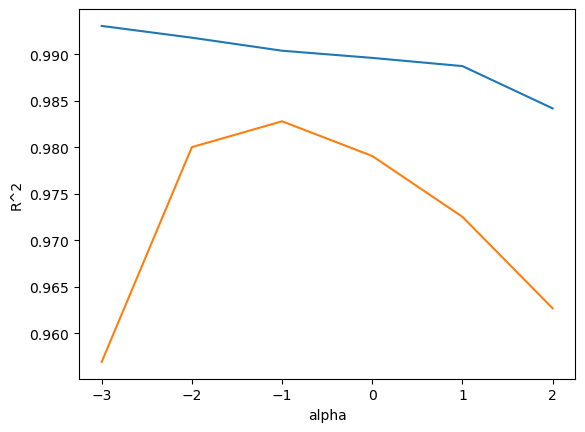

In [23]:
# alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해, 로그함수로 바꾸어 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

In [24]:
# 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 점수가 높은 -1
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

# 훈련 세트와 테스트 세트 점수 출력
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


In [25]:
# Lasso import
from sklearn.linear_model import Lasso

# 인스턴스 생성
lasso = Lasso()

# 모델 훈련
lasso.fit(train_scaled, train_target)

# 훈련 세트 점수 출력
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [26]:
# 테스트 세트 점수 출력
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [27]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

# 경고가 뜬다면?
# 사이킷런의 라쏘 모델을 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복횟수가 부족할 때 이런 경고가 발생

C:\Users\kejh6\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\kejh6\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


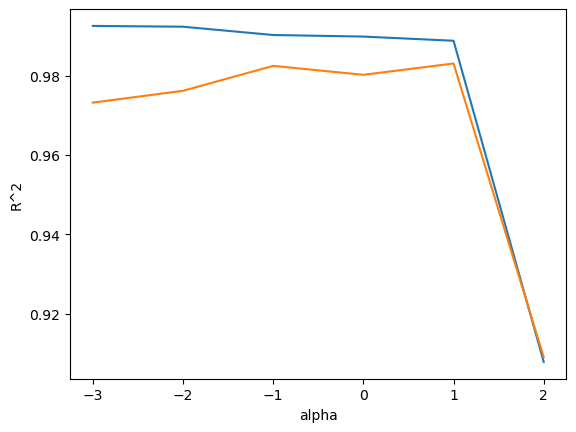

In [28]:
# alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해, 로그함수로 바꾸어 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

In [29]:
# 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 점수가 높은 1
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

# 훈련 세트와 테스트 세트 점수 출력
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [30]:
# 라쏘 모델은 계수 값을 0으로도 만들 수 있음
# 55개 중 40개의 계수가 0
print(np.sum(lasso.coef_ == 0))

# 라쏘 모델이 사용한 특성은 15개 뿐 -> 라쏘는 유용한 특성을 골라내는 용도로 사용

40


## 로지스틱 회귀
* 럭키백에 들어간 생선의 크기, 무게 등이 주어졌을 때, 7개 생선에 대한 확률을 출력해야 함
* 길이, 높이, 두께 외에도 대각선 길이와 무게도 사용 가능

In [31]:
import pandas as pd

# 인터넷에서 csv 파일을 읽음
fish = pd.read_csv("https://bit.ly/fish_csv_data")

# 5개 행 출력
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [32]:
# Species 열에서 고유한 값 출력
print(pd.unique(fish["Species"]))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [33]:
# Species를 제외한 5개 열을 입력 데이터로 사용
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()

In [34]:
# fish_input의 5개 행 출력
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [35]:
# Species 열을 타깃으로 사용
fish_target = fish["Species"].to_numpy()

In [36]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트 나눔
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [37]:
# StandardScaler 클래스를 통해 훈련 세트, 테스트 세트 표준화 전처리
from sklearn.preprocessing import StandardScaler

# 인스턴스 생성
ss = StandardScaler()

# 모델 훈련
ss.fit(train_input)

# 훈련 세트 변환
train_scaled = ss.transform(train_input)

# 테스트 세트 변환
test_scaled = ss.transform(test_input)

In [38]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])

# True인 index 위치의 값만 출력
# 불리언 인덱싱
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [39]:
# bream_smelt_indexes 배열은 훈련 세트 중 'Bream'과 'Smelt'일 때 True 값 할당 이외는 False
bream_smelt_indexes = (train_target == "Bream") |  (train_target == "Smelt")

# train_scaled 배열에 불리언(True or False) 인덱싱 적용
train_bream_smelt = train_scaled[bream_smelt_indexes]

# train_target 배열에 불리언(True or False) 인덱싱 적용
target_bream_smelt = train_target[bream_smelt_indexes]

In [40]:
# LogisticRegression 클래스 import
from sklearn.linear_model import LogisticRegression

# 객체 생성
lr = LogisticRegression()

# 모델 훈련
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [41]:
# train_bream_smelt의 처음 5개 샘플 출력
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [42]:
# predict_proba() 메서드로 처음 5개 샘플의 예측 확률 출력
print(lr.predict_proba(train_bream_smelt[:5]))

# 첫 번째 열이 음성 클래스(0)에 대한 확률, 두 번째 열이 양성 클래스(1)에 대한 확률

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [43]:
# 알파벳 순으로 타깃값을 출력
print(lr.classes_)

# 사이킷런은 타깃값을 알파벳순으로 정렬하여 사용
# 두 번쨰 샘플만 양성클래스인 빙어의 확률이 높음
# 나머지는 모두 도미로 예측

['Bream' 'Smelt']


In [44]:
# 로지스틱 회귀가 학습한 계수 출력
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [45]:
decisions = lr.decision_function(train_bream_smelt[:5])

# train_bream_smelt의 처음 5개 샘플의 z값을 출력
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [46]:
# 시그모이드 함수인 expit import
from scipy.special import expit

# 시그모이드 함수를 통과한 값을 출력
print(expit(decisions))

# 이전의 predict_proba() 멧머드의 출력의 두 번째 열의 값과 동일

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 다중분류

In [47]:
# max_iter=1000으로 반복횟수를 1,000으로 설정
# LogisticRegression에서 규제를 제어하는 매개변수 C
# C가 작을수록 규제가 커짐. C이 기본값은 1
lr = LogisticRegression(C=20, max_iter = 1000)

# 모델 훈련
lr.fit(train_scaled, train_target)

# 훈련 세트 score 출력
print(lr.score(train_scaled, train_target))

# 테스트 세트 score 출력
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [48]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [49]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 확률
proba = lr.predict_proba(test_scaled[:5])

# 소수점 3째 자리 유지
# 소수점 4째 자리에서 반올림
print(np.round(proba, decimals = 3))

# 5개 샘플에 대한 예측 -> 5행
# 7개 생선에 대한 확률 -> 7열

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [50]:
# 클래스 정보 출력
print(lr.classes_)

# 첫 번째 샘플은 Perch를 가장 높은 확률로 예측
# 두 번째 샘플은 Smelt를 가장 높은 확률로 예측

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [51]:
# coef_와 intercept_의 크기 출력
# 다중분류는 클래스마다 z값을 계산하므로 7행
# 5개의 특성을 사용하므로 5열
print(lr.coef_.shape, lr.intercept_.shape)

# 이진분류는 sigmoid 함수로 (0, 1) 사이의 값으로 변환
# 다중분류는 softmax 함수로 7개 z값을 확률로 변환

(7, 5) (7,)


In [52]:
# decision_function() 메서드로 z1~z7까지의 값을 구함
decision = lr.decision_function(test_scaled[:5])

# 소수점 2째 자리 유지: 소수점 3째 자리에서 반올림
# decision_function() 메서드로 z1~z7까지의 값을 구함
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [53]:
# softmax 함수란, 여러 개의 선형방정식 출력값을 (0, 1) 사이로 압축하고 전체 합이 1이 되도록 만듦 -> 정규화된 지수 함수

# softmax import
from scipy.special import softmax

# 각 샘플에 대해 softmax 계산
# axis = 1로 지정하여 각 행, 즉 샘플에 대한 소프트맥스 계산
proba = softmax(decision, axis = 1)

# 소수점 3째 자리 유지
# 소수점 4째 자리에서 반올림
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## SGD Classifier

In [54]:
import pandas as pd

# fish_csv_data 파일에서 데이터프레임화
fish = pd.read_csv("https://bit.ly/fish_csv_data")

In [55]:
# Species를 제외한 나머지 5개는 입력 데이터로 사용
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()

# Species 열을 타깃 데이터로 사용
fish_target = fish["Species"].to_numpy()

In [56]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트 나눔
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [57]:
# StandardScaler 클래스를 통해 훈련 세트, 테스트 세트 표준화 전처리
from sklearn.preprocessing import StandardScaler

# 인스턴스 생성
ss = StandardScaler()

# 모델 훈련
ss.fit(train_input)

# 훈련 세트 변환
train_scaled = ss.transform(train_input)

# 테스트 세트 변환
test_scaled = ss.transform(test_input)

In [58]:
# SGDClassifier 클래스 import
from sklearn.linear_model import SGDClassifier

In [59]:
# 객체를 생성하면서, 손실함수로 'log' (로지스틱 손실함수)
# max_iter = 10으로 에포크 횟수를 10으로 설정
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)

# 모델 훈련
sc.fit(train_scaled, train_target)

# 훈련 세트 score 출력
print(sc.score(train_scaled, train_target))

# 테스트 세트 score 출력
print(sc.score(test_scaled, test_target))

# 반복횟수 10번이 부족하여 경고가 나타남

0.773109243697479
0.775


C:\Users\kejh6\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\kejh6\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [60]:
# partial_fit() 메서드를 통해 점진적 학습 진행
sc.partial_fit(train_scaled, train_target)

# 훈련 세트 score 출력
print(sc.score(train_scaled, train_target))

# 테스트 세트 score 출력
print(sc.score(test_scaled, test_target))

# 모델 sc를 추가로 더 훈련. 모델을 이어서 훈련시에는 partial_fit() 메서드 이용. 호출할 때마다 1에포크씩 이어서 훈련.
# 아직 점수가 낮지만 정확도 향상 -> 얼마나 더 훈련해야 할까?

0.8151260504201681
0.85


In [61]:
import numpy as np

# 객체를 생성하면서, 손실함수로 'log' (로지스틱 손실 함수)
sc = SGDClassifier(loss = "log", random_state = 42)

# 훈련 세트 점수를 저장할 리스트 생성
train_score = []

# 테스트 세트를 저장할 리스트 생성
test_score = []

# train_target에 있는 7개 생선의 목록 생성
classes = np.unique(train_target)

In [62]:
# 300번의 에포크 동안 훈련 반복
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    
    # 반복 당 훈련 세트 점수를 train_score 리스트에 추가
    train_score.append(sc.score(train_scaled, train_target))
    
    # 반복 당 테스트 세트 점수를 test_score 리스트에 추가
    test_score.append(sc.score(test_scaled, test_target))

C:\Users\kejh6\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


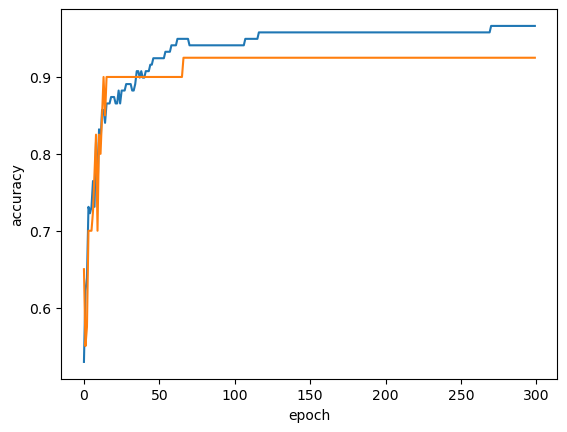

In [63]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

# 백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있음
# 에포크 초기에는 과소적합되어 훈련 세트와 테스트 세트의 점수가 낮음
# 이 모델의 경우 백 번째 에포크가 적절한 반복 횟수

In [64]:
# 객체를 생성하면서 반복 횟수를 100으로 설정
# tol = None으로 지정하여 자동으로 멈추지 않음
sc = SGDClassifier(loss = "log", max_iter = 100, tol = None, random_state = 42)

# 모델 학습
sc.fit(train_scaled, train_target)

# 훈련 세트 score 출력
print(sc.score(train_scaled, train_target))

# 테스트 세트 score 출력
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


C:\Users\kejh6\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [65]:
# 객체를 생성하면서 손실함수로 'hinge'
# loss 매개변수의 기본값은 hinge. 힌지 손실은 SVM을 위한 소실함수 -> 이 값을 이용하면, SVM 방식으로 분류
sc = SGDClassifier(loss = "hinge", max_iter = 100, tol = None, random_state = 42)

# 모델 학습
sc.fit(train_scaled, train_target)

# 훈련 세트 score 출력
print(sc.score(train_scaled, train_target))

# 테스트 세트 score 출력
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


## 나이브 베이즈
* sklearn의 Twenty Newsgroups이라는 18,846개의 뉴스 그룹 데이터 사용
* 해당 데이터는 train 11,314개, test 7,532개로 분류되어 있음
* Data Download: subset = "all", "train", "test"

In [66]:
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset="train")
print(newsdata.keys())
print(len(newsdata.data), len(newsdata.filenames), len(newsdata.target_names), len(newsdata.target))

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
11314 11314 20 11314


In [67]:
# 20개의 카테고리 이름 출력
print(newsdata.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [68]:
# 첫 번째 샘플에 대하여 7번 카테고리에 속하는 데이터임을 확인
print(newsdata.target[0])

7


In [69]:
# 7번 카테고리 이름은 'rec.autos'
print(newsdata.target_names[7])

rec.autos


In [70]:
# 첫 번째 샘플 데이터를 출력하여 내용 확인
# 스포츠카에 대한 설명
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [71]:
# 텍스트 데이터를 BoW로 만드는 CountVectorizer 라이브러리 사용
# 단어의 순서를 고려하지 않고, 문서 내에 단어의 등장 횟수를 고려하여 BoW vector 생성
# 각 단어에 index 지정 후, 각 단어의 등장 횟수를 index에 맞게 배치
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(newsdata.data)
print(X_train_dtm.shape)

# 11,314는 train dataset 개수, 130,107은 전체 훈련 데이터에 등장한 단어 수

(11314, 130107)


In [72]:
# TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도와 역 문서 빈도의 값을 사용하여 단어들마다 중요한 가중치를 주는 방식
# TF: 특정 문서 d에서 특정 단어 t의 등장 횟수
# DF: 특정 단서 t가 등장한 문서의 수 -> IDF: DF의 반비례 값
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvector = TfidfVectorizer()
X_train_tfidf = tfidfvector.fit_transform(newsdata.data)
print(X_train_tfidf.shape)

(11314, 130107)


In [73]:
# Multinomial NB는 데이터 특징이 출현 횟수로 표현
# 설명 변수가 연속형 변수일 때, Gaussian NB
# 설명 변수가 범주형 변수일 때, Multinomial NB
# 범주형인데, 이진형인 경우 Bernoulli NB

# alpha = 1.0: 모델 복잡도 조절 파라미터
# alpha가 주어지면, 모든 특성에 양의 값을 가진 가상의 data를 alpha개만큼 추가 (smoothing)

mod = MultinomialNB(alpha = 1.0)
mod.fit(X_train_tfidf, newsdata.target)

newsdata_test = fetch_20newsgroups(subset="test", shuffle = True)
X_test_dtm = dtmvector.transform(newsdata_test.data)
tfidfv_test = tfidfvector.transform(newsdata_test.data)

predicted = mod.predict(tfidfv_test)
print("Accuracy: ", accuracy_score(newsdata_test.target, predicted))

Accuracy:  0.7738980350504514
